In [1]:
# Add cloud to sst glorys
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sys
import matplotlib.pyplot as plt
import numpy as np
import os
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.ticker as mticker

folder_data = "/Odyssey/private/t22picar/data/sst_L4/"
file_obs = "SST_L4_OSTIA_2019.nc"

maps = xr.open_dataset(folder_data+file_obs)
lat = maps.latitude.values
lon = maps.longitude.values

folder_data_4th = "/Odyssey/public/glorys/reanalysis/"
file_glorys_4th = "glorys12_multivar_2020_4th.nc"
maps_glo_4th = xr.open_dataset(folder_data_4th+file_glorys_4th)

maps = maps.rename({"latitude": "lat"})
maps = maps.rename({"longitude": "lon"})
maps = maps.rename({"analysed_sst": "thetao"})

# Original grid 1/12 (2041,4320) --> 1/4
new_sizes = [size // 3 for size in (2041, 4320)]
print('new sizes: {}'.format(new_sizes))

def regrid_da(regrid_sizes, da: xr.DataArray):

        lat_space = np.linspace(start=maps_glo_4th.lat.min(), stop=maps_glo_4th.lat.max(), num=regrid_sizes[0])
        lon_space = np.linspace(start=maps_glo_4th.lon.min(), stop=maps_glo_4th.lon.max(), num=regrid_sizes[1])

        new_da = da.interp({"lat":lat_space, "lon":lon_space}, method="linear")

        return new_da

new sizes: [680, 1440]


In [ ]:
# Interpolation new grid
maps_4th = regrid_da(new_sizes,maps)
maps_4th.thetao.values = maps_4th.thetao.values - 273.15

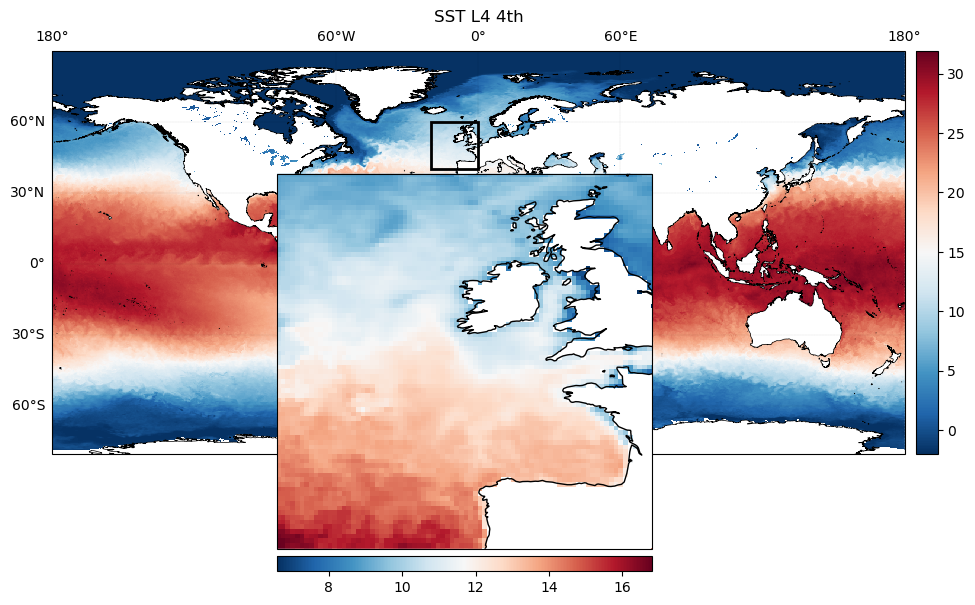

In [21]:
import sys
sys.path.append("/Odyssey/private/t22picar/tools/")
from plot_tools import plot_map_zoom

plot_map_zoom(maps_4th.thetao[0],maps_4th.lon.values,maps_4th.lat.values,title="SST L4 4th")

In [22]:
# save data 
save_file=file_obs[:-3]+"_4th"+".nc"
# Sauvegarder le DataArray en fichier NetCDF
maps_4th.to_netcdf(folder_data+save_file)
